## Describe problem

Since the living standard is getting higher and higher after entering into the 21st century, several problems occur along with unhealthy eating habits. According to the statistics, there will be overall 34.2 million people more having diabetes by 2020, 10.5% of which are the US population. As the number of people getting diabetes rises, the pressure of testing diabetes also increases. There turned out to be some negative facts when a patient takes diabetes tests in the hospital.


## Analysis task

First, based on the list, patients are required to complete more than 10 items in order to get the test result, which is too time-consuming. Second, when the number of people who get diabete is increasing (National Report), the number of equipment becomes inefficient. Hospitals have to cost more on buying new equipment meanwhile maintaining the old machines. Third, over-listed testing requirements ask for a high medical expense, but some of them are actually not necessarily needed. Therefore, by doing this project, we wish to solve the problem of how hospitals can offer patients the most efficient way of diabetes testing. 

To achieve this purpose, we will build a model that only tests the necessary features to get the correct medical result. If we could solve this problem, the patients’ waiting and examining hours will be shortened; the equipment will be efficient, and hence reduce the costs of hospitals; moreover, by shrinking into the specific features, the testing expenses for the patients will also be reduced. 


## Data process

In [1]:
# This is a comment section, which will not be executed as part of the python script
# matplotlib inline makes your matplotlib plot embedded in the jupyter notebook cell
%matplotlib inline

# Here "as np" is aliasing the library name to a short abbrev
import numpy as np

import pandas as pd
import seaborn as sns

# "from ... import ..." allows us to import specific submodule from the library
from matplotlib import pyplot as plt

### This is to set pandas to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Here we check the top 5 results of the dataframe and find that some data has missing value as '?', so we want to replace the value as NaN.

In [3]:
df = df.replace('?',np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

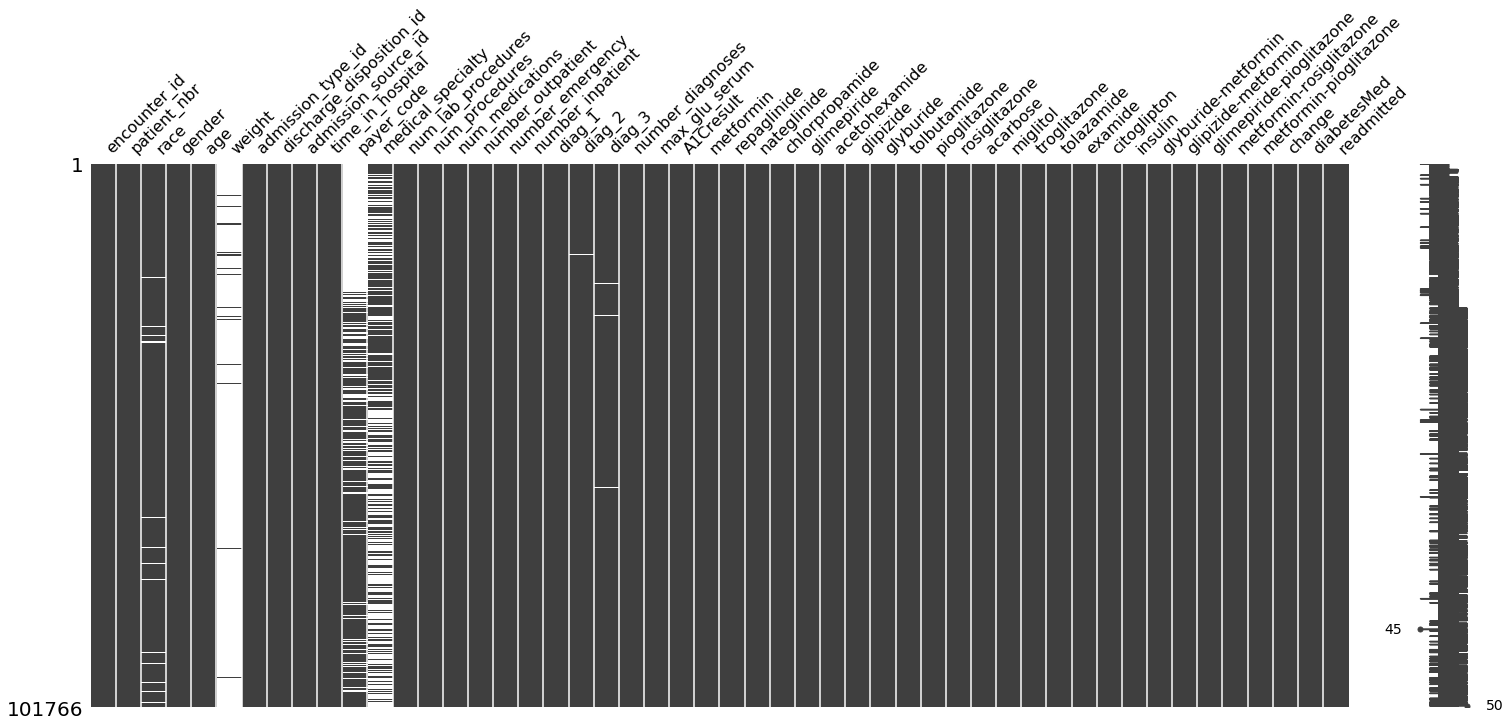

In [5]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)

This image shows that the white block is the missing value, we try to remove the rows with empty data, resulting in the smaller number of data. So we decide to remove the three columns, such like weight, payer_code and medicanl_speciality.

In [6]:
all_cols = list(df.columns)

In [7]:
df = df.drop(['encounter_id','patient_nbr',"weight","payer_code","medical_specialty"], axis = 1)

In [8]:
df.dropna(inplace = True)

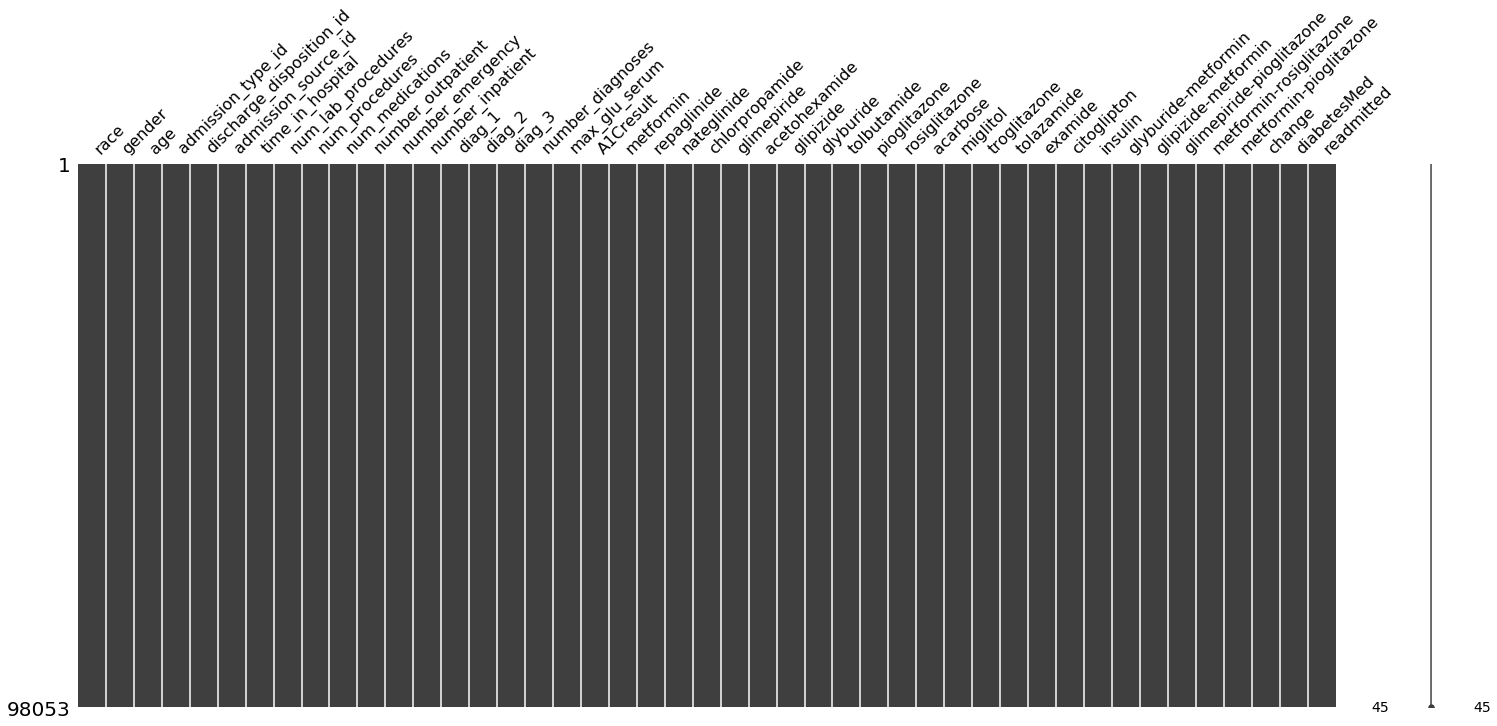

In [9]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)

This graph shows that the result contains no missing value.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2               

Because some features are not int type, if we remove these features, the rest of data may not result into the good model. Hence, we decide to transform the string data into int data.

### description of feature

race: Caucasian, Asian, African American, Hispanic, and other

Gender: male, female and unknown/invalid

Age: [0,10), [10,20), ... [90,100)

Admission type : 9 values

Discharge disposition: 29 values

Admission source: 21 values

time in hospital: remove

payer code: 23 values

medical specialty:

glucose serum test result: range of result

A1c test result: '>7' = greater than 7%

Label: change of medications

In [11]:
from sklearn.preprocessing import LabelEncoder 
remove_col = []
all_cols = list(df.columns)
le = LabelEncoder()
for col in all_cols:
    if(df[col].dtypes != 'int64'):
        s = set(df[col])
        y = le.fit_transform(df[col])
        if len(set(y)) == 1:
            remove_col.append(col)
        df[col] = y
    print(col,set(y), s)

race {0, 1, 2, 3, 4} {'Asian', 'AfricanAmerican', 'Caucasian', 'Hispanic', 'Other'}
gender {0, 1, 2} {'Female', 'Unknown/Invalid', 'Male'}
age {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-100)', '[20-30)', '[60-70)', '[10-20)', '[40-50)', '[50-60)', '[70-80)', '[0-10)', '[80-90)'}
admission_type_id {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-100)', '[20-30)', '[60-70)', '[10-20)', '[40-50)', '[50-60)', '[70-80)', '[0-10)', '[80-90)'}
discharge_disposition_id {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-100)', '[20-30)', '[60-70)', '[10-20)', '[40-50)', '[50-60)', '[70-80)', '[0-10)', '[80-90)'}
admission_source_id {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-100)', '[20-30)', '[60-70)', '[10-20)', '[40-50)', '[50-60)', '[70-80)', '[0-10)', '[80-90)'}
time_in_hospital {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-100)', '[20-30)', '[60-70)', '[10-20)', '[40-50)', '[50-60)', '[70-80)', '[0-10)', '[80-90)'}
num_lab_procedures {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {'[30-40)', '[90-

In [12]:
cols = df.columns

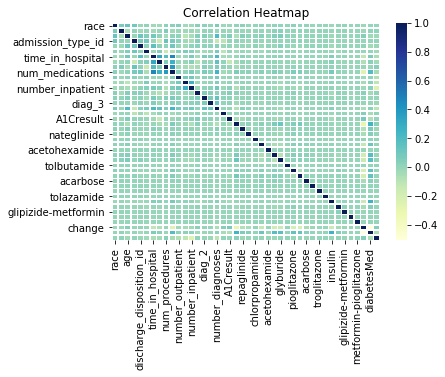

In [13]:
vars_to_use = [item for item in cols if item not in remove_col] # pick vars
plt.title('Correlation Heatmap')
sns.heatmap(df[vars_to_use].corr(),annot=False, fmt="f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Here, we want to find the main dimensions which help us to compress the data into small size.

We use PCA to calculate the cov of dataframe and compute the eigenvalues which help us to find the weight of each feature.

finally, we find the age, race and gender is top 3 weight feature, after we build the decision tree, we will implement the pca data.

In [14]:
cov = df[vars_to_use].cov()

In [15]:
import numpy as np
eig_val, eig_vec = np.linalg.eig(cov)

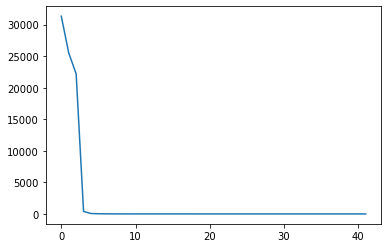

In [16]:
plt.plot(eig_val)
plt.show()

In [17]:
total = sum(eig_val)
for i in range(len(vars_to_use)):
    print(vars_to_use[i], eig_val[i]/total)

race 0.39371963370161045
gender 0.32071661180698147
age 0.27898098889598616
admission_type_id 0.004940628669071916
discharge_disposition_id 0.0007863448647460391
admission_source_id 0.0003488994564904768
time_in_hospital 0.00020742521587846076
num_lab_procedures 8.056661791769524e-05
num_procedures 4.278747638718541e-05
num_medications 3.1962816785196095e-05
number_outpatient 2.815692321463492e-05
number_emergency 2.3828341800340387e-05
number_inpatient 2.037861369839961e-05
diag_1 1.8301208164267663e-05
diag_2 9.560643801103227e-06
diag_3 9.059654317634512e-06
number_diagnoses 8.811036289405853e-06
max_glu_serum 5.437036485727402e-06
A1Cresult 4.26095095337505e-06
metformin 3.2156528882597043e-06
repaglinide 3.0535587865937676e-06
nateglinide 1.9030822730948097e-06
chlorpropamide 1.6863149100688978e-06
glimepiride 1.3458166365260478e-06
acetohexamide 1.1950344923795745e-06
glipizide 1.158105289754156e-06
glyburide 9.303173442006989e-07
tolbutamide 6.753521246440119e-07
pioglitazone 7.

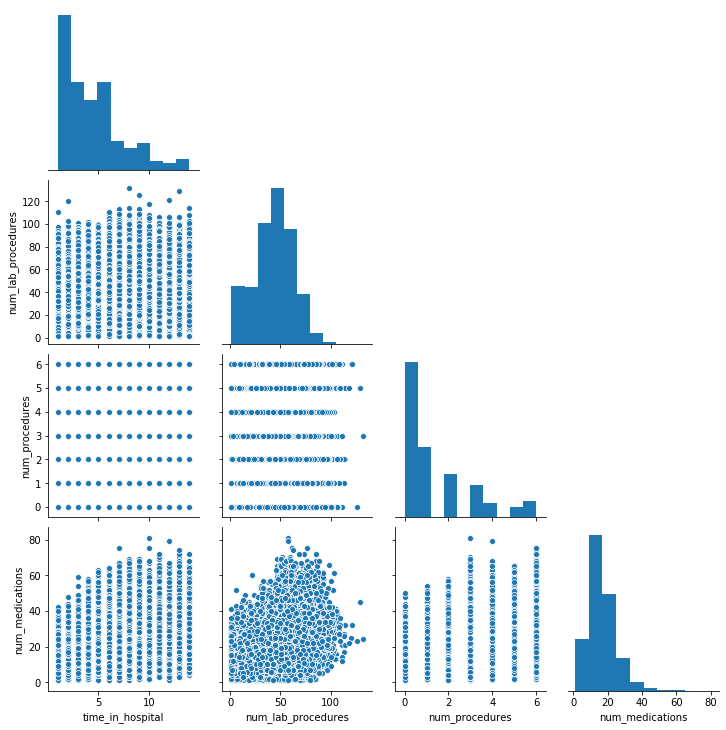

In [18]:
sns.pairplot(df[["time_in_hospital", "num_lab_procedures", "num_procedures","num_medications"]],corner=True)
plt.show()

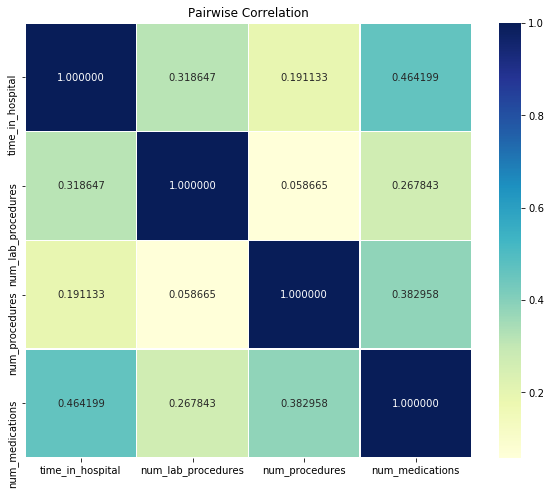

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["time_in_hospital", "num_lab_procedures", "num_procedures","num_medications"]].corr(), annot=True, fmt="f", cmap="YlGnBu", linewidths=0.5)
plt.title('Pairwise Correlation')
plt.show()

### Approach

During  the analyzing process, we used two approaches to figure out whether a person has diabetes or not. 
The first approach is the decision tree model, which is a supervised machine learning technique for inducing a decision tree from training data. A decision tree is a predictive model which is a mapping from observations about an item to conclusions about its target value. Here, take the top three features for example. Change, Insulin and Metformin are at the top of the tree, which means they are the most important features in this training model. According to entropy theory, Information entropy is usually used to describe the average amount of information that results from the entire random distribution and is more statistically specific. 

From the equation, it can be seen that the information entropy H(X) is the cumulative value of each self-information, and since each is an integer positive, the more times the random variable takes the value, the more times it accumulates, the greater the entropy of the information, the greater the degree of confusion, and the lower the purity. The broader the distribution, the greater the entropy, and within the same defined domain, due to the impulse distribution in the broadness of the distribution < Gaussian distribution < uniform distribution Therefore, the relationship between entropy is pulse distribution of information entropy < Gaussian distribution of information entropy < uniform distribution of information entropy. It can be proved mathematically that entropy is greatest when the distribution of random variables is uniform, i.e. when the number of states is highest. Applied to our model, we use the information gain ( Information entropy - conditional entropy). Information gain represents the degree to which 

information complexity (uncertainty) is reduced under one condition. In the decision tree algorithm, our aim is to select one feature at a time. If there are multiple features, the information gain can be used as a measure. If a feature is selected with the greatest information gain (the greatest reduction in information uncertainty), then we choose that feature. In our model, Change, Insulin and Metformin are the greatest information gains.
The other approach we used is Principal Component Analysis (PCA). PCA is a process of identifying the high level of information retention of the data, and then replacing the raw data with the most significant features of the data. It is one of the most important methods of dimensionality reduction. In simple terms, it is the transformation of data from the original space into a new feature space, e.g., the original space is three-dimensional (x,y ,z), x, y, and z are the three bases of the original space, and we can somehow use the new coordinate system (a,b, c) to represent the original data, then a, b, and c are the new bases, and they form the new feature space. In the new feature space, it may be that all data projections on c are close to zero, i.e. negligible, then we can just Use (a,b) to represent the data so that the data are reduced from three-dimensional (x,y,z) to two-dimensional (a,b). We zero-average the raw data, then derive the covariance matrix, then derive the eigenvectors and eigenvalues from the covariance matrix, and these eigenvectors form the new feature space. Here, we use PCA in order to keep data information as much as possible.



In [20]:
X = df.drop(['diabetesMed'],axis = 1)
Y = df['diabetesMed']

In [21]:
X.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')

Class 0: 75351
Class 1: 22702


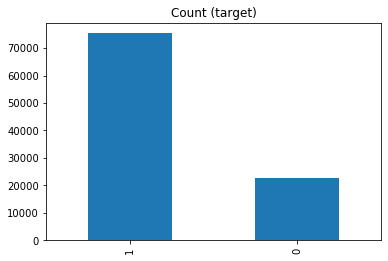

In [22]:

target_count = Y.value_counts() #count numbers of each class
#show the amount in each class
target_count.plot(kind='bar', title='Count (target)');
target_count = list(target_count)
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=50)

print("Num training samples:", len(X_train), "Num testing samples:", len(X_test))

Num training samples: 78442 Num testing samples: 19611


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

'''
Write your code below
'''
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9969914843710163

Text(0.5, 1, 'Confusion Matrix')

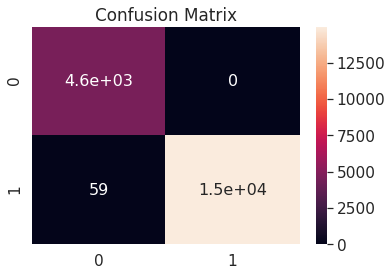

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(conf_mat, range(2),range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

In [27]:
import numpy as np
eig_val, eig_vec = np.linalg.eig(X.cov())

In [28]:
total = sum(eig_val)
for i in range(len(X.columns)):
    print(list(X.columns)[i], eig_val[i]/total)

race 0.39372051387646606
gender 0.32071732752690674
age 0.27898161282038775
admission_type_id 0.004940636139079
discharge_disposition_id 0.000786274287449603
admission_source_id 0.00034889080972700444
time_in_hospital 0.00020742457807398936
num_lab_procedures 8.05649535956088e-05
num_procedures 4.2787424724582593e-05
num_medications 3.1939194988707784e-05
number_outpatient 2.815635988418637e-05
number_emergency 2.3828113056375835e-05
number_inpatient 2.037760692226999e-05
diag_1 1.83011235729596e-05
diag_2 9.545460244535023e-06
diag_3 8.956350091558296e-06
number_diagnoses 8.708928404775846e-06
max_glu_serum 5.419141337098398e-06
A1Cresult 3.6851105297643363e-06
metformin 3.048173041108532e-06
repaglinide 3.1430626430777565e-06
nateglinide 1.8670075303499174e-06
chlorpropamide 1.6818247809929268e-06
glimepiride 1.3023704896382129e-06
acetohexamide 1.1940954864915756e-06
glipizide 9.318161477772862e-07
glyburide 6.857481623469074e-07
tolbutamide 7.122797109482077e-07
pioglitazone 2.3006

## Improve, implement PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
pca.explained_variance_ratio_

array([3.93720514e-01, 3.20717328e-01, 2.78981613e-01, 4.94063614e-03,
       7.86274287e-04, 3.48890810e-04])

In [30]:
pca_X = pca.transform(X)

In [31]:
#pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])

In [32]:
from sklearn.model_selection import train_test_split

pca_X_train, pca_X_test, y_train, y_test = train_test_split(pca_X,Y,test_size=0.2, random_state=50)

print("Num training samples:", len(pca_X_train), "Num testing samples:", len(pca_X_test))

Num training samples: 78442 Num testing samples: 19611


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

'''
Write your code below
'''
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(pca_X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
from sklearn.metrics import accuracy_score

pred = clf.predict(pca_X_test)
accuracy_score(y_test, pred)

0.7623782571006068

Text(0.5, 1, 'Confusion Matrix')

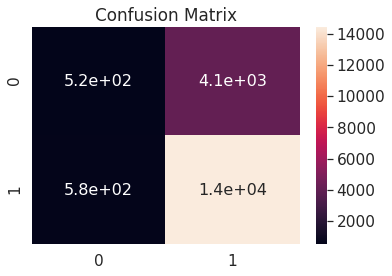

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(conf_mat, range(2),range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

## drop personal information

In [36]:
X = df.drop(['diabetesMed'],axis = 1)
X = X.iloc[:,17:]
Y = df['diabetesMed']

In [37]:
X.columns

Index(['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=50)

print("Num training samples:", len(X_train), "Num testing samples:", len(X_test))

Num training samples: 78442 Num testing samples: 19611


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

'''
Write your code below
'''
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9969914843710163

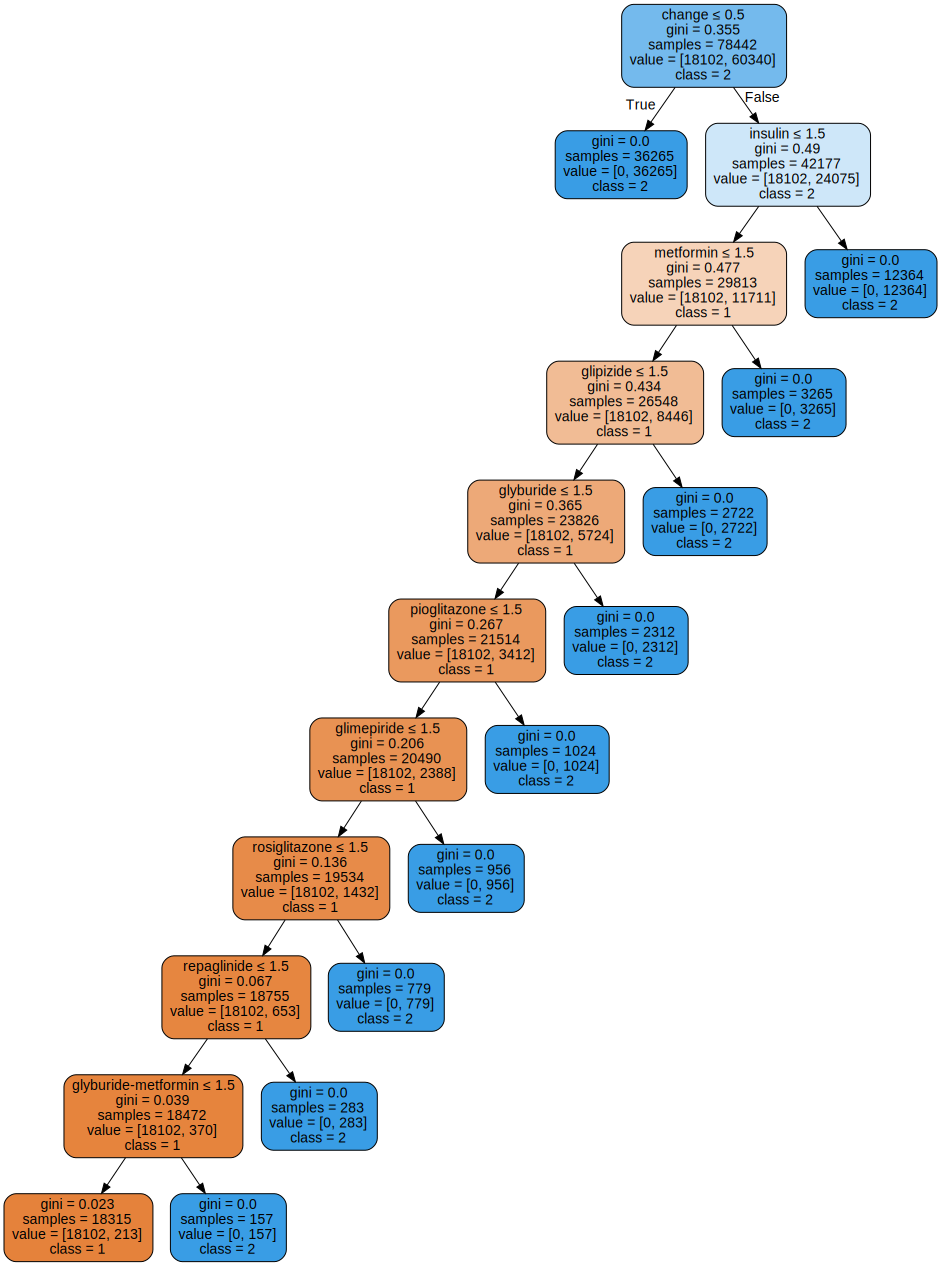

In [41]:
import graphviz
import os
feature_names = list(X_test.columns) 
class_names = ['1', '2', '3']

'''
Write your code below
'''
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature_names,\
                                class_names=class_names, filled=True,\
                                rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

Text(0.5, 1, 'Confusion Matrix')

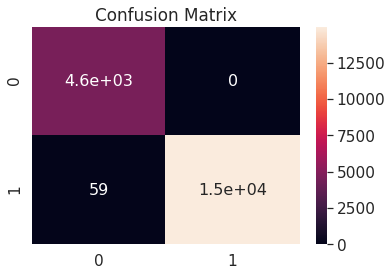

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(conf_mat, range(2),range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

## PCA

In [43]:
eig_val, eig_vec = np.linalg.eig(X.cov())
total = sum(eig_val)
for i in range(len(X.columns)):
    print(list(X.columns)[i], eig_val[i]/total)

max_glu_serum 0.2892371734366437
A1Cresult 0.19098547308153727
metformin 0.1257690625183079
repaglinide 0.10450697760082313
nateglinide 0.06152198638137348
chlorpropamide 0.0546181298110954
glimepiride 0.04279445553045121
acetohexamide 0.039309389524198594
glipizide 0.03014765437933832
glyburide 0.023168489673578523
tolbutamide 0.022274490539067434
pioglitazone 0.007460722394389842
rosiglitazone 0.0031143323077734465
acarbose 0.0028069447184867493
miglitol 0.0013540144668306628
troglitazone 0.0004176890886220288
tolazamide 0.00017786732431120157
examide 0.00016550693351677416
citoglipton 9.104884067032685e-05
insulin 5.375436250722393e-05
glyburide-metformin 1.2418152582818944e-05
glipizide-metformin 4.1390036304904155e-06
glimepiride-pioglitazone 4.1398015600616465e-06
metformin-rosiglitazone 4.140128703670846e-06
metformin-pioglitazone 0.0
change 0.0
readmitted 0.0


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
pca.explained_variance_ratio_

array([0.28923717, 0.19098547, 0.12576906, 0.10450698, 0.06152199,
       0.05461813])

In [45]:
pca_X = pca.transform(X)

In [46]:
from sklearn.model_selection import train_test_split

pca_X_train, pca_X_test, y_train, y_test = train_test_split(pca_X,Y,test_size=0.2, random_state=50)

print("Num training samples:", len(pca_X_train), "Num testing samples:", len(pca_X_test))

Num training samples: 78442 Num testing samples: 19611


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

'''
Write your code below
'''
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(pca_X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
from sklearn.metrics import accuracy_score

pred = clf.predict(pca_X_test)
accuracy_score(y_test, pred)

0.9991331395645301

Text(0.5, 1, 'Confusion Matrix')

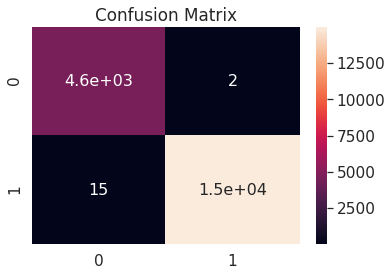

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(conf_mat, range(2),range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.title('Confusion Matrix')

### Analysis Results

For this project, we aim to improve model accuracy by reducing feature quantities. To better evaluate the results, we calculated the accuracy and got a confusion matrix before we implemented the analysis of the Principal Component Analysis (PCA). So that we can compare the accuracy and the confusion matrix before and after we alter the data. These two measurements are the most direct way to see the efficiency of drop less weighted features through PCA. To start with, after data preparation and reclassification, we first calculate the accuracy of the original model, which is 99.7%. Then we implemented PCA, the accuracy suddenly dropped to 76%. After getting the weight of each feature, according to the decision tree’s estimation on features, the top ones are the main features of medication-related features such as insulin. Furthermore, we found that the bottom features on the decision tree are less weighted and have small significance in affecting the data. These features are all related to personal identities in a total of 16. So we decide to remove these 16 features of personal information such as age, gender, etc. Then we tested for accuracy on the original model (without 16 features) firstly, the accuracy remained 99.7%. However, after PCA implementation, the accuracy increased to 99.9%.（Exhibit 3) This is a very good result because it’s pretty close to 100%. Indicating the model is well established. That by removing less weighted features, we can reduce distraction caused by these features, so we could reach a better accuracy of the model.


### Insights gained 

Through the analysis on the decision tree and the PCA, we reduced the number of required testing features and locked on the accuracy of remaining features. It is found that after removing the features with low weight, the accuracy of our model increased from 76% to 99.9%. This accuracy means the remaining feature data with high weight are the proper features we are looking for to answer our research question. These proper features include the related hormone and the medication that can well control the diabetes.

### Future works

Currently, our work has answered the original question. And we believe there can be more updates on our future work. For instance, how can we further increase the accuracy? What are the correlations of the remaining features to diabetes? And how can we further upgrade our current model. These are the future improvements we can consider deeper.
